## Inicjalizacja środowiska programistycznego

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

2024-03-12 10:59:53.356151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 10:59:53.356367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 10:59:53.729162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>


**Uczenie maszynowe** , samouczenie się maszyn albo systemy uczące się (ang. machine learning) – obszar sztucznej inteligencji poświęcony algorytmom, które poprawiają się automatycznie poprzez doświadczenie, czyli ekspozycję na dane. 

[Uczenie maszynowe. Wikipedia : wolna encyklopedia, 2022-12-23 20:26Z](https://pl.wikipedia.org/wiki/Uczenie_maszynowe)



**Algorytm** – skończony ciąg jasno zdefiniowanych czynności koniecznych do wykonania pewnego rodzaju zadań, sposób postępowania prowadzący do rozwiązania problemu. Można go przedstawić na schemacie blokowym.

[Algorytm. Wikipedia : wolna encyklopedia, 2023-03-13 09:38Z](https://pl.wikipedia.org/wiki/Algorytm) 

<div>
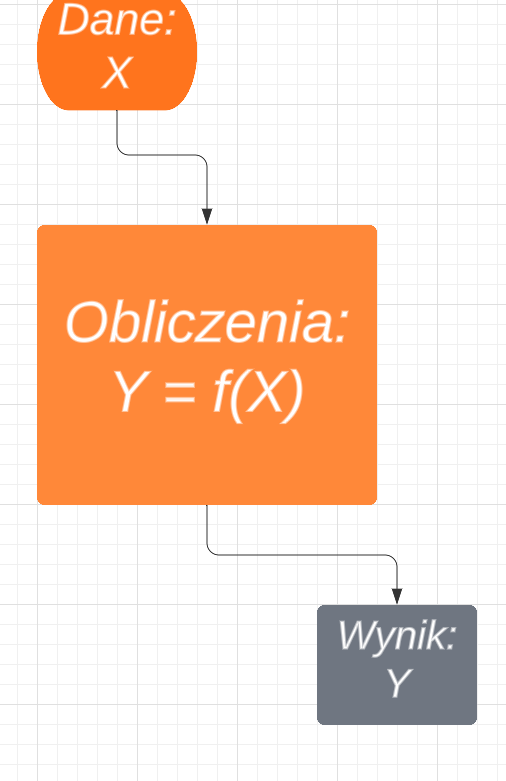
</div>

   **Dane** - dowolny zestaw liczb: **X**
      <br> <br> <br>
   **Wynik** - dowolny inny zestaw liczb: **Y** 
      <br> <br> <br> 
   **Zadanie** - wykonanie obliczeń na danych, czyli znalezienie wartości pewnej funkcji, np.
      znalezienie pierwiastków równania kwadratowego:
  <br> <br> <br> 
    $$
    \huge{
     a\cdot x^{2} + b\cdot x + c = 0
    }
    $$

<div>
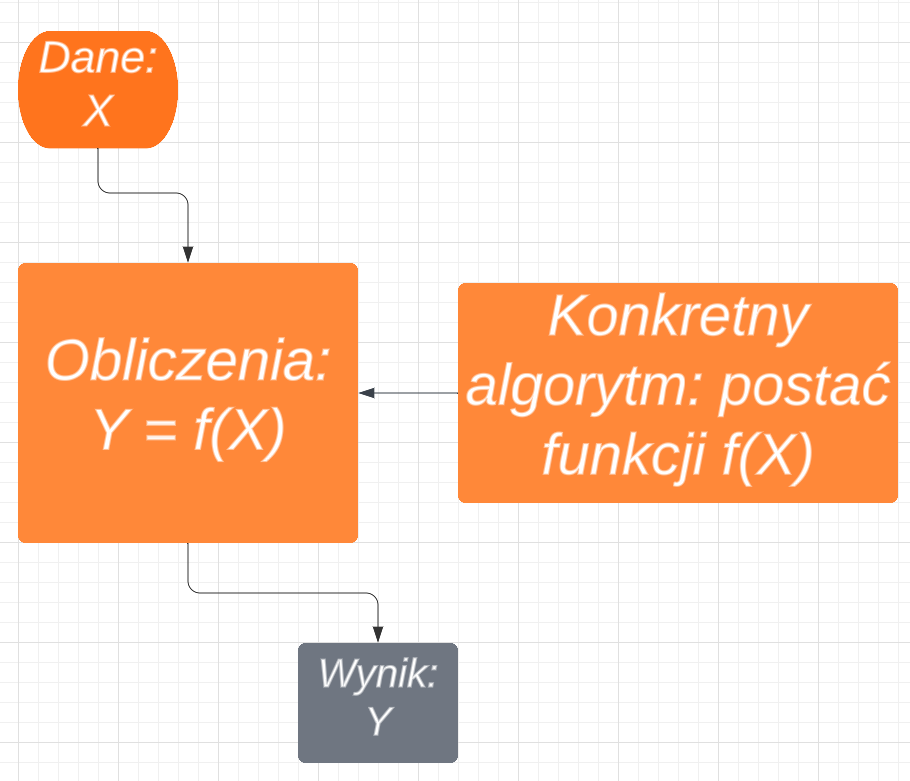
</div>

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

**Podejście "klasyczne"** - dla każdego zagadnienia definiujemy (my=człowiek) odpowiedni algorytm.

<div>
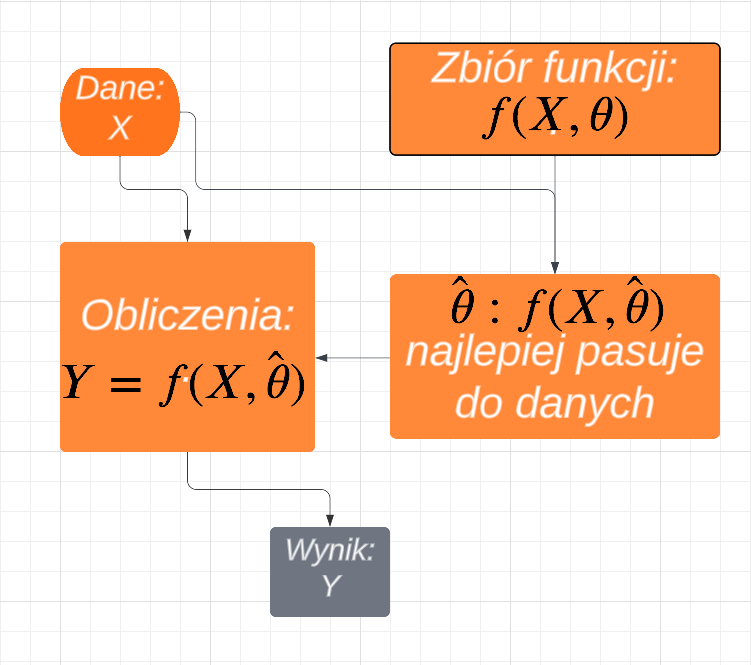
</div>

<br>

**Podejście "maszynowe"** - definiujemy zbiór funkcji, numerowawany parametrami $\theta$:
    <br></br>
    $$
    \huge{
     f(X, \theta)
    }
    $$
    <br></br>
    który może zawierać funkcję która rozwiązuje nasz problem:
    <br></br>
    $$
    \huge{
     f(X, \hat{\theta}) = Y
    }
    $$
    <br></br>

Musimy jakoś zdefiniować funkcję $f(X, \hat{\theta})$. Definiujemy ją jako rozwinięcie w pewnej bazie znanych funkcji $g_{i}$
    $$
    \huge{
     f(X, \hat{\theta}) = \sum_{i} \theta_{i} g_{i}(X)
    }
    $$

i poszukujemy jakoś współczynników rozwinięcia $\theta_{i}$    

Twierdzenie Taylora mówi, że każdą (rozsądną) funkcję można zapisać jako nieskończoną sumę wielomianów: 
$$
\huge{
\begin{matrix}
f(h, a_{n}) = 
\sum_{n=0}^{\infty} a_{n}h^{n} = \\
a_{0} + a_{1}h + a_{2}h^{2} +...,~~ h = x-x_{0}
\end{matrix}
}
$$
Możemy więc użyć ich jako bazy. Parametry $\theta_{i}$ to po prostu współczynniki rozwinięcia Taylora:
<br></br>
$$
\huge{
a_{i} = \frac{f^{(n)}(x=x_{0})}{n!}
}
$$

Jeśli jednak znamy współczynniki rozwinięcia nie mamy nic do zrobienia - **znamy przecież postać funkcji $f(x)$**

Co zrobić jeśli nie znamy rozwinięcia Taylora, bo nie znamy postaci funkcji? 
Znamy jedynie jej wartości w pewnych punktach, czyli dane w postaci zbioru par: $(x_{i}, y_{i})$
i poszukujemy zależności: $y_{i} = f(x_{i})$.

W tej sytuacji szukamy parametrów które są `najlepsze` według pewnego kryterium, nazywanego zwykle **funckją straty**
(ang. loss function), $L$. 

Najprostsze kryterium to **średni błąd kwadratowy** (ang. mean square error - MSE):
<br></br>
$$
{\huge
MSE(\theta) = \frac{1}{n}\sum_{i} (y_{i} - f(x_{i}, \theta))^{2}
}
$$

**Uwaga na temat notacji:**

$x_{i}$ to dane dla jednego punktu, przykładu, w danych wejściowych. Jeśli dane wejściowe są jednowymiarowe mamy jedną liczbę, jeśli są k-wymiarowe mamy tu k liczb.
Pojedynczy przykład jest więc wektorem liczb: $\mathbf{x} = (x_{0}, x_{1}, ...)$.
Wiele przykładów można składać jeden nad drugim w kolejnych wierszach i wtedy uzyskujemy macierz $\mathbf{X}$ o n wierszach:

* **wiersze** - kolejne punkty, przykłady, danych
* **kolumny** - kolejne cechy punktu

$$
{\huge
X = \begin{bmatrix}
x_{0,0} & x_{1,1} & \dots & x_{0,k-1}\\
x_{1,0} & x_{1,1} & \dots & x_{1,,k-1}\\
\dots   & \dots   & \dots & \dots     \\ 
x_{k-1,0} & x_{k-1,1} & \dots & x_{n-1,,k-1}\\
\end{bmatrix}
}
$$

Wartości w różnych punktach łączy tak samo w macierz $\mathbf{Y}$ o k wierszach:

* **wiersze** - wartość w kolejnych punktach danych
* **kolumny** - kolejne składowe wartości jesli wynik nie jest pojedynczą liczbą



W notacji numpy mamy macierz o kształcie `(n,k)` i łatwo możemy wybierać jej fragmenty:

* definicja macierzy:
```Python
x = np.full( (n,k), value)
```

* przykład o indeksie 10:
```Python
x[10,:]
```
* przykład o indeksie 10 i kolumny o indeksach 3 i 4:
```Python
x[10,3:5]
```
* kolumny 3 i 4 dla wszystkich przykładów:
```Python
x[:,3:5]
```

* klasy analizujące dane zwkle przyjmują paczki (ang. batch) danych. W tej sytuacji jeden przykład trzeba wyłuskać jako macierz o kształcie (1,n), a nie (n,):

```Python
x[10:11,:]
```

**Proszę:**

* wypisać na ekran efekt wszystkich powyższych operacji
* zrócić uwagę na różnicę między `x[10,:]` a `x[10:11,:]`

In [2]:
#BEGIN_SOLUTION
n = 11
k = 5
value = 15
x = np.full( (n,k), value)

print(colored("x[10,:] -","blue"),x[10,:])
print(colored("x[10,3:5] -","blue"), x[10,3:5])
print(colored("x[:,3:5] -","blue"),x[:,3:5])
print(colored("x[10:11,:] -","blue"),x[10:11,:])
#END_SOLUTION
pass

x[10,:] - [15 15 15 15 15]
x[10,3:5] - [15 15]
x[:,3:5] - [[15 15]
 [15 15]
 [15 15]
 [15 15]
 [15 15]
 [15 15]
 [15 15]
 [15 15]
 [15 15]
 [15 15]
 [15 15]]
x[10:11,:] - [[15 15 15 15 15]]


W szczególnych przypadkach, np. gdy $f(x)$ jest funkcją liniową:

$$
{\huge
f(\mathbf{X}, \mathbf{\theta}) = X \cdot \mathbf{\theta} + \theta_{0}
}
$$

Parametry które minimalizują MSE można znaleźć analitycznie. W innych przypadkach musimy poszukiwać rozwiązania numerycznie.

Sprawa się komplikuje jeśli zakładamy (zwykle słusznie), że nie ma jednoznacznego deterministycznego związku między $y$ a $x$, a związek jest jedynie statystyczny.
Najprostszy model takiego niedeterministycznego związku to obecność szumu $\epsilon$ w $y$:

$$
\huge{
y = f(x) + \epsilon
}
$$

 gdzie $x$ i $y$ to są teraz **zmienne losowe** opisane wspólnym rozkładem prawdopodobieństwa $p(x,y)$ 



W tej sytuacji wartość funkcji straty to oszacowanie średniej z rozkładem danym $p(x,y)$:

$$
{\huge
\begin{matrix}
MSE = E_{x,y \sim p(x,y)} ( [Y - f(X, \theta)]^{2}) = \\
\int (Y - f(X, \theta))^{2} p(x,y) dx dy =
 \vert p(x,y) = p(y|x)p(x) \vert \\
\int \left[\int (Y - f(X, \theta))^{2}  p(y|x)p(x) dy \right] dx = \\
\int \left[\int (Y - f(X, \theta))^{2}  p(y|x) dy \right] p(x) dx = \\
E_{x \sim p(x)} \left[ E_{y \sim p(y|x)} (Y - f(X, \theta))^{2} \right]
\end{matrix}
}
$$


Jeśli poszukujemy $f(x, \theta)$ która minimalizuje MSE wystarczy wykonać minimalizację dla każdej wartości `x` oddzielnie:

$$
{\huge
f(x) = argmin_{c} E_{y \sim p(y|x)}((y-c)^{2})
}
$$

dla kwadratowej funkcji straty rozwiązaniem jest:

$$
{\huge
f(x) = E_{y \sim p(y|x)}(y) = E(y|x)
}
$$

natomiast dla funkcji straty w postaci modułu: 

$$
{\huge
f(x) = argmin_{c} E_{y \sim p(y|x)}(|y-c|)
}
$$

rozwiązaniem jest mediana: 

$$
{\huge
f(x) = mediana(y|x)
}
$$

**Uwaga o notacji**:

* problem w którym szukana funkcja zwraca jakąś wartość rzeczywistą nazywamy **regresją**

* strata postaci modułu: 

$$
{\huge
|f(X) - Y|
}
$$

jest określana stratą typu $\mathbf{L_{1}}$

* strata w postaci kwadratowej: 

$$
{\huge
(f(X) - Y)^{2}
}
$$

jest określana stratą typu $\mathbf{L_{2}}$.

* czynnik uśredniający po liczbie elementów: $1/n$ nie zawsze jest uwzględniany

W przypadku gdy poszukiwana funkcja nie zwraca ciągłej wartości, ale kategorię, `g`, do której należy przykład opisany wektorem cech  
$\mathbf{x} = (x_{0}, x_{1}, ...)$, a $g$ należy do pewnego skończonego zbioru kategorii $g \in G$ mamy do  czynienia z **klasyfikacją**.

W tej sytuacji można by użyć straty `0`, `1` zależnie od tego czy `f(x)` poprawnie przypisało kategorię do zestawu cech.
Uzyskujemy wtedy **klasyfikator Bayesa**: 

$$
{\huge
f(x) = max_{g \in G} P(g|x)
}
$$

który przypisuje przykład do kategorii która ma największe prawdopodobieństwo pod warunkiem zadanego zestawu cech.
Strata `0-1` jest jednak funkcją nieróżniczkowalną, które zmienia sie tylko w jednym punkcie, więć nie jest użyteczna numerycznie.

W rzeczywistych zastosowaniach funkcję przypisującą kategorię znajduje się w dwu krokach:

1) $f(x)$ reprezentujące $p(g|x)$. Mamy tu zagadnienie analogiczne do regresji - poszukiwanie funkcji o ciągłej wartości. Nie znamy jednak prawdziwego $p(g|x)$ 
 więc nie możemy użyć funkcji straty $L_{2}$. Używamy tutaj funkcji straty która prowadzi do $f(x)$ które reprezentuje rozkład 
 prawdopodobieństwa zmaksymalizowany przez zbiór uczący:
 

$$
{\huge
\begin{matrix*}[l]
L(f(x)) = - \frac{1}{n}\sum_{i}\log f_{g}(x_{i}), \\
\\
\text{gdzie:}\\
i~\text{- numer przykładu} \\
\text{g - poprawna kategoria przykładu}\\
f_{g} - \text{oszacowanie prawdopodobieństwa przynależności w} \\ \mathbf{~poprawnej~} \text{kategorii} \\
\end{matrix*}
}
$$
 <br></br>

2) wybór właściwej klasy na podstawie oszacowania $p(g|x)$ (niekoniecznie używając kryterium Bayesa: $g: \text{argmax}_{g} p(g|x)$)


Funkcja straty $L(f(x))$ nazywa się **entropią krzyżową** (ang. cross-entropy).

**Proszę**:

* wygenerować 1000 par $(x,y)$, gdzie:
    * $x$ - liczby losowe rozkładem płaskim w zakresie $[0,1]$
    * 
    $$
    \huge{
    y = 
    \begin{cases}
      1 & \text{gdy x>0 i x<0.5} \\
      0 & \text{w każdym innym przypadku}
      \end{cases}
    }
    $$
    
 * stworzyć panel z dwoma rysunkami w rzędzie:
 ```Python
 fig, axes = plt.subplots(1,2, figsize=(10,5))
 ```
 * narysować rozkład par $(x,y)$ na lewym rysunku
 * dopasować wielomian stopnia `polyDegree` i narysować wykres dopasowanej funkcji na tym samym rysunku. Proszę użyć klasy
   `np.polynomial.polynomial.Polynomial`:
   ```Python
   
   polyDegree = 100
   model = np.polynomial.polynomial.Polynomial(coef=np.zeros(polyDegree+1))
   model = model.fit(x, y, deg = polyDegree)
   y_pred = model(x)
   ```
   


 * narysować wartości parametrów wielomianu na prawym rysunku
 * wykonać kod komórki dla `polyDegree=0`, `polyDegree=1`, `polyDegree=10`, `polyDegree=100` i  `polyDegree=1000` 
 * skomentować wyniki: czy jakość modelu rośnie z rzędem wielomianu? Dlaczego? 

/usr/local/lib/python3.11/dist-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


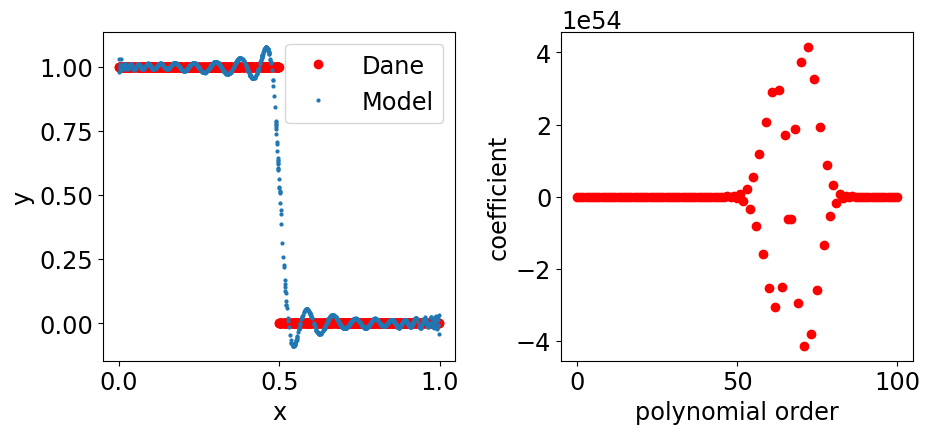

In [3]:
#BEGIN_SOLUTION
x = np.random.default_rng().uniform(0,1,1000)
y = (x>0)*(x<0.5)
y = y.astype(np.float64)

polyDegree = 100
model = np.polynomial.polynomial.Polynomial(coef=np.zeros(polyDegree+1))
model = model.fit(x, y, deg = polyDegree)
y_pred = model(x)

fig, axes = plt.subplots(1,2, figsize=(9,4.5))
axes[0].plot(x,y,"o", color="red", label="Dane");
axes[0].plot(x,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

axes[1].plot(model.convert().coef,"o", color="red", label="Coefficients");
axes[1].set_xlabel('polynomial order')
axes[1].set_ylabel('coefficient')
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

**Proszę**:

Obliczyć funkcje straty `L1` oraz `L2` między danymi a modelem dla `polyDegree = 100`

* bezpośrednio, korzystając z operacji macierzowych `numpy` 
* korzystając z funkcji zaimplementowanych w bibliotece `tensorflow`:
  ```Python
  tf.keras.losses.MeanAbsoluteError()
  tf.keras.losses.MeanSquaredError()
  ```

In [4]:
import tensorflow as tf

#BEGIN_SOLUTION
L1 = np.mean(np.abs(y - y_pred))
L2 = np.mean((y - y_pred)**2)

print(colored("Numpy:","red"))
print(colored("L1: ","blue"),L1)
print(colored("L2: ","blue"),L2)
L1 = tf.keras.losses.MeanAbsoluteError()(y_true = y, y_pred = y_pred)
L2 = tf.keras.losses.MeanSquaredError()(y_true = y, y_pred = y_pred)

print(colored("Keras:","red"))
print(colored("L1: ","blue"),L1)
print(colored("L2: ","blue"),L2)
#END_SOLUTION
pass

Numpy:
L1:  0.029119629108525658
L2:  0.005081812977369084
Keras:
L1:  tf.Tensor(0.029119629108525658, shape=(), dtype=float64)
L2:  tf.Tensor(0.005081812977369083, shape=(), dtype=float64)


### Trening

W jaki sposób znajdujemy parametry funkcji $\mathbf{\theta}$?

<br></br>

Obliczamy wektor gradientu funkcji straty względem parametrów modelu i zmieniamy te parametry w kierunku przeciwnym do grandientu - czyli "w dół".

Stochastyczny spadek wzdłuż gradientu. `stochastic gradient descent, SGD`:

1) inicjalizujemy parametry modelu `init_theta`

2) wybieramy paczkę danych ze zbioru uczącego, ang. `batch`.
   Wartości funkcji straty i gradientu będziemy uśredniali po paczkach by usyskać większą stabilność

4) obliczamy gradient funkcji straty **względem parametrów modelu**.
   W przypadku średniego błędu kwadratowego mamy:
<br></br>
$$
\huge{
\nabla_{\theta} L = \nabla_{\theta} \frac{1}{N} \sum_{X} (y - f(x,\theta))^{2} = \\
\frac{2}{N} \sum_{X} (y - f(x,\theta)) \nabla_{\theta} f(x, \theta)
}
$$
<br></br>

4) aktualizujemy wektor parametrów odejmując gradient przeskalowany przez **współczynnik uczenia** ang. learning rate
<br></br>
$$
\huge{
 \mathbf{\theta_{i+1}} = \mathbf{\theta_{i}} - \alpha \cdot \nabla_{\theta} L
}
$$
<br></br>
5) przebiegamy przez cały zbiór uczący. Jeden przebieg jest nazywany **epoką**, ang. epoch

6) procedurę powtarzamy wielokrotnie, aż zostaną spełnione kryteria które nałożyliśmy na proces uczenia

<br></br>

W rzeczywistych zastosowaniach używamy zaawansowanych algorytmów minimalizacyjnych. 
Jednym z najbardziej popularnych algorytów jest `adaptive moment estimation` - [adam](https://arxiv.org/abs/1412.6980)

Każdy z algorytmów minimalizacyjnych korzysta jednak z gradientu funkcji straty względem parametrów modelu.
Obliczanie tego gradientu w złożonych modelach staje się kosztowne. Gradient jest obliczany z użyciem techniki 
[automatycznego różniczkowania](https://en.wikipedia.org/wiki/Automatic_differentiation). Operacja ta wymaga zapisania
pośrednich kroków obliczania wartości podanej złożonej funkcji, np. funkcji straty.

Wyniki pośrednie kroków są zapisywane na "taśmie", ang. tape w czasie obliczania wartości funkcji $f(x)$.

* proces obliczania wartości o danych początkowych: $x$ do wyniku $f(x)$ nazywane jest przebiegiem do przodu, ang. `forward pass`, lub feedforward

* proces aktualizacji wag z użyciem gradientów jest nazywany jest przebiegiem wstecz, ang. `backward pass` lub feedbackward lub backpropagation
  
* klasa która odpowiada za zbieranie danych wymaganych do obliczania gradientu to `tf.GradientTape`:

In [5]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

print(colored("f(x) = x**2","blue"))  
print(colored("df/dx at x=3:","blue"),tape.gradient(y, x))  

f(x) = x**2
df/dx at x=3: tf.Tensor(6.0, shape=(), dtype=float32)


**Proszę:**

* narysować wykres `f(x) = exp(-2x)` dla `x` zakresie `[0,5]`
* użyć klasy `tf.GradientTape()` do obliczenia pochodnej `f(x)`
* narysować wykres pochodnej na tym samym wykresie
* zmodyfikować wykres by sprawdzić poprawność obliczonej pochodnej

**Uwaga:** proszę uzywać wariantów funkcji numerycznych z biblioteki TensorFlow: 
```Python
tf.exp(...)
```

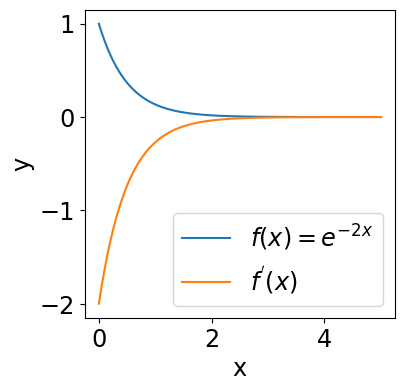

In [6]:
#BEGIN_SOLUTION
x = tf.Variable(tf.linspace(0,5,100))

with tf.GradientTape() as tape:
  y = tf.exp(-2*x)

yPrim = tape.gradient(y, x)

fig, axis = plt.subplots(1,1, figsize=(4,4))
axis.plot(x,y,label=r"$f(x) = e^{-2x}$")
axis.plot(x,yPrim, label=r"$f^{'}(x)$")
#axis.plot(x,-0.5*yPrim, label=r"$-0.5 \cdot f^{'}(x)$")
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.legend()

#END_SOLUTION
pass

Znajdźmy teraz wartości współczynników trójmianu kwadratowego, które najlepiej opisują dane.
Zaimplementujmy algorytm gradientu stochastycznego z użyciem automatycznego obliczania gradientu.

**Dane:**

losowe pary liczb `(x,y)` spełniające równanie:

$$
\huge{
  y = -2 + 3x + 2x^{2}
}
$$

**Model:** 

$$
\huge{
  p_{0} + p_{1}x + p_{2}x^{2}
}
$$

**Parametry modelu:**

$$
\huge{
  p_{0}, p_{1}, p_{2}
}
$$

**Uwaga:** w miejscu gdzie używamy biblioteki TensorFlow należy starać się używać funkcji z tej biblioteki, zamiast ich wariantów z numpy. To pozwala na uniknięcie błędów związanych z niespójnością formatów danych.

* biblioteka TensorFlow używa klasy `tf.Tensor` jako elementarnej reprezentacji macierzy:
  <br></br>
  ```Python
  x = tf.Variable([np.pi,np.exp(1)])
  print(x)
  <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([3.1415927, 2.7182817], dtype=float32)>
  ```
  <br></br>
* biblioteka Numpy używa klasy `np.array` jako elementarnej reprezentacji macierzy
  <br></br>
  ```Python
  x = np.array([np.pi,np.exp(1)])
  print(x)
  [3.14159265 2.71828183]
  ```

In [7]:
%%time

#Input data - features
x = tf.random.uniform((1000,1), 0,1)

#input data - targets
y = 2*x**2 + 3*x - 2

#model parameters - weights
weights = [tf.Variable(0.0, name="p2"),
           tf.Variable(0.0, name="p1"),
           tf.Variable(0.0, name="p0")]

print(colored("Initial model weights:","blue"))
[print(w.numpy(),end=" ") for w in weights]
print("")

#number of iterations - updates of the model parameters
nIterations = 5000

#learning rate
lr = 0.01

#the training loop
for iter in range(0,nIterations):
    #gradient tape preparation
    with tf.GradientTape() as tape:
            y_pred = tf.math.polyval(coeffs=weights, x=x)
            loss = tf.keras.losses.MeanSquaredError()(y_true = y, y_pred = y_pred)
            gradient = tape.gradient(loss, weights)
    #parameters update    
    for w,g in zip(weights, gradient):
        w.assign_sub(lr*g)
print(colored("Final model weights:","blue"))
[print(w.numpy(), end=" ") for w in weights]
print("")

Initial model weights:
0.0 0.0 0.0 
Final model weights:
2.5335624 2.4443097 -1.9007301 
CPU times: user 23.5 s, sys: 27.2 ms, total: 23.5 s
Wall time: 23.8 s


**Proszę:**

* obliczyć explicite obliczyć pochodną funkcji straty względem parametru $p_{2}$ uśrednioną po trzech losowych wartościach `x` przymując
  `y_pred = 0`
* porównać wynik z wartością zwracaną przez `tf.GradientTape` dla tych samych danych wejściowych

In [8]:
#BEGIN_SOLUTION
x = tf.random.uniform((3,1), 0,1)
y = 2*x**2 + 3*x - 2
yPrim = np.mean(-2*y*x**2)

y_pred = tf.Variable(0.0)
weights = [tf.Variable(0.0, name="p2"),
           tf.Variable(0.0, name="p1"),
           tf.Variable(0.0, name="p0")]

with tf.GradientTape() as tape:
    y_pred = tf.math.polyval(coeffs=weights, x=x)
    loss = tf.keras.losses.MeanSquaredError()(y_true = y, y_pred = y_pred)
    gradient = tape.gradient(loss, weights)

print(colored("Manual derivative: ","blue"),yPrim)
print(colored("GradientTape derivative: ","blue"), gradient[0].numpy())
#END_SOLUTION
pass

Manual derivative:  -1.3717531
GradientTape derivative:  -1.3717532


**Proszę**:

* stworzyć panel z dwoma rysunkami w rzędzie
* narysować dane i przewidywania modelu na lewym panelu
* na prawym panelu narysować wartość funkcji straty w kolejnych iteracjach i ewolucję współczynnika stojącego przy $x^{2}$
* na podstawie analizy rysunku dobrać liczbę iteracji
* wypróbować różne wartości współczynnika uczenia
* wypróbować różne postacie funkcji straty z listy: [link](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

**Wskazówki:**

* w czasie dopracowywania kodu rysunków proszę użyć małej liczby iteracji
* proszę użyć metody `append()` klasy list do zachowowania kolejnych wartości funkcji straty:
  <br></br>
```Python
loss_history.append(loss)
```
 <br></br>
* w czasie zapisywania wartości parametrów modelu proszę wyłuskać wartość z tensora korzystając z metody `tf.Tensor.numpy()`:
   <br></br>
```Python
x.numpy()
```
**Pytanie:** czy model zbiega do wartości współczynników użytych w danych? 

CPU times: user 19.5 s, sys: 113 ms, total: 19.6 s
Wall time: 19.7 s


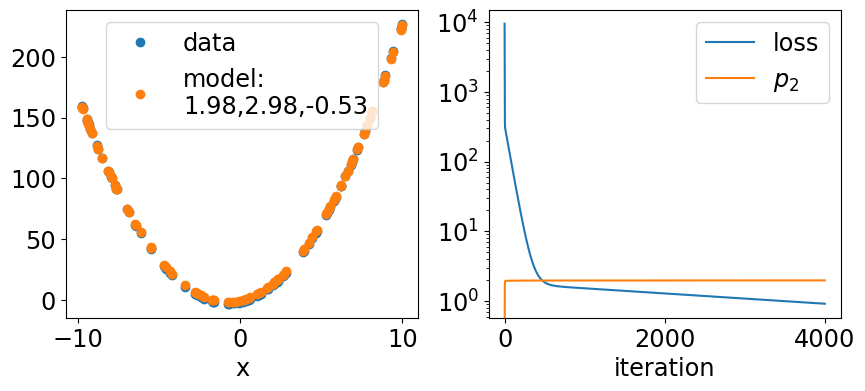

In [9]:
%%time 
#BEGIN_SOLUTION

#Input data - features
nPoints = 100
x = tf.random.uniform((nPoints,1), -10,10)
y = 2*x**2 + 3*x - 2

weights = [tf.Variable(0.0, name="p0"),
           tf.Variable(0.0, name="p1"),
           tf.Variable(0.0, name="p2")]

nIterations = 4000
lr = 1E-4

loss_history = []
p_history = []
#loop over oterations
for iter in range(0,nIterations):
    #gradient tape preparation
    with tf.GradientTape() as tape:
            y_pred = tf.math.polyval(coeffs=weights, x=x)
            loss = tf.keras.losses.MeanSquaredError()(y_true = y, y_pred = y_pred)
            #loss = tf.keras.losses.MeanAbsolutePercentageError()(y_true = y, y_pred = y_pred)
            loss_history.append(loss)
            p_history.append(weights[0].numpy())
            gradient = tape.gradient(loss, weights)
    #parameters update    
    for w,g in zip(weights, gradient):
        w.assign_sub(lr*g)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(x,y, "o",label="data")

y_pred = tf.math.polyval(coeffs=weights, x=x)
axes[0].plot(x,y_pred,"o",label="model:\n{:3.2f},{:3.2f},{:3.2f}".format(weights[0].numpy(), 
                                                                         weights[1].numpy(), 
                                                                         weights[2].numpy()))
axes[0].set_xlabel('x')
axes[0].set_ylabel('')
axes[0].legend()

axes[1].plot(loss_history,label="loss")
axes[1].plot(p_history,label=r"$p_{2}$")
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('')
axes[1].set_yscale('log')
axes[1].legend()
#END_SOLUTION
pass

**Proszę:**

Użyć algorytmu zejścia po gradiencie do znalezienia punktu $p$ dla którego suma ogledłości od punktów 
w zbiorze $\cal{Z}$ jest minimalna. 

* jako zbiór $\cal{Z}$ proszę przyjąć losowe punkty na okręgu o środku w punkcie `(0,0)` i promieniu `5`.
* początkową wartość $p$ proszę ustalić na (10,10)
* obliczenia proszę wykonać na siatce w zakresie $\pm10$
* proszę narysować zbiór $\cal{Z}$
* proszę narysować trajektorię punktu $p$ w czasie procesu minimalizacji

**Uwaga:** klasa `GradientTape` wymaga by wszystkie obliczenia funkcji dla której ma być znaleziony gradient były wykonane z użyciem funkcji TensorFlow    

p =  (-0.653, -0.937)
Loss: 4.928452
CPU times: user 1.12 s, sys: 75.4 ms, total: 1.2 s
Wall time: 1.22 s


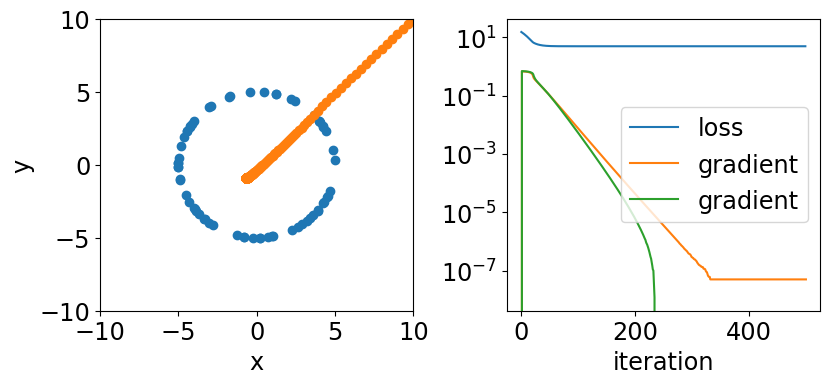

In [10]:
%%time

#Prepare the z dataset
nx = 2000
ny = 2000
r = 5

x = np.random.default_rng().uniform(-10,10,nx)
y = np.random.default_rng().uniform(-10,10,ny)
xv, yv = np.meshgrid(x, y)

#use ineffective point generation method 
#to show the numpy filtering abilities
circleFilter = np.abs(xv**2 + yv**2 - r**2)<0.001
xv = xv[circleFilter]
yv = yv[circleFilter]
z = np.array((xv,yv)).transpose()

#BEGIN_SOLUTION
#########
#define loss function as a mean distance of a proposed point from
#points in z dataset
def lossFunction(p, z):
    d = tf.subtract(z,p)
    d = tf.sqrt(tf.math.reduce_sum(d**2, axis=1))
    d = tf.math.reduce_mean(d)
    #d = tf.math.reduce_max(d)
    return d
#########

##Perform training loop
weights = tf.Variable((10.0, 10.0), name="p")

nIterations = 500
lr = 0.5

loss_history = []
gradient_history = np.array([[0,0]])
p_history = weights.numpy().reshape(-1,2)
#loop over oterations
for iter in range(0,nIterations):
    #gradient tape preparation
    with tf.GradientTape() as tape:
            loss = lossFunction(weights, z)
            gradient = tape.gradient(loss, weights)
            loss_history.append(loss)
            p_history = np.concatenate((p_history,weights.numpy().reshape(-1,2)), axis=0)
            gradient_history = np.concatenate((gradient_history,gradient.numpy().reshape(-1,2)), axis=0)
            weights.assign_sub(lr*gradient)
####      
print(colored("p = ","blue"),"({:3.3f}, {:3.3f})".format(weights[0].numpy(), weights[1].numpy()))
print(colored("Loss:","blue"),loss.numpy())
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].plot(xv, yv, marker='o', linestyle='none');
axes[0].plot(p_history[:,0],p_history[:,1], marker='o', linestyle='none');
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim( (-10,10))
axes[0].set_ylim( (-10,10));

axes[1].plot(loss_history,label="loss")
axes[1].plot(gradient_history,label="gradient")
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('')
axes[1].set_yscale('log')
axes[1].legend()
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

# Zadanie domowe

**Proszę:**

Użyć algorytmu zejścia po gradiencie do znalezienia zbioru `nPoints=100` punktów dla których suma odległości od dwu ustalonych punktów: `f1` oraz `f2` wynosi $2a$. 
Proszę przyjąć `epsilon= 0.5`, `a=10`, `f1=(-5,0)`, `f2=(5,0)`

* proszę narysować znalezione punkty na rysunku o osiach w zakresie $\pm 12$
* narysować trajektorię wybranego punktu w czasie procesu minimalizacji
* na tym samym rysunku narysować analityczne rozwiązanie problemu

**Uwaga:** klasa `GradientTape` wymaga by wszystkie obliczenia funkcji dla której ma być znaleziony gradient były wykonane z użyciem funkcji TensorFlow. Parametry opisujące zagednienie należy przekazać jako `tf.Variable`    

Loss: 0.21153831
CPU times: user 9.87 s, sys: 26.7 ms, total: 9.89 s
Wall time: 9.88 s


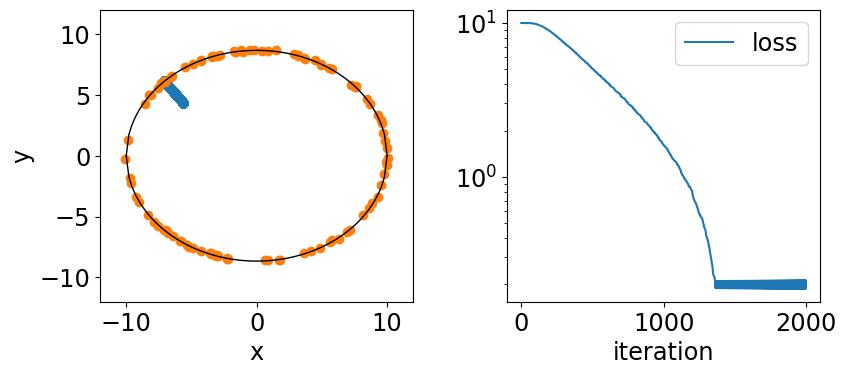

In [11]:
%%time

#BEGIN_SOLUTION
#########
#define loss function as a mean distance of a proposed point from
#points in z dataset
def lossFunction(f1, f2, a, z):
    
    d1 = tf.subtract(z,f1)
    d2 = tf.subtract(z,f2)
    d1 = tf.sqrt(tf.math.reduce_sum(d1**2, axis=1))
    d2 = tf.sqrt(tf.math.reduce_sum(d2**2, axis=1))
    
    d = tf.add(d1, d2)
    d = tf.subtract(d,2*a)
    d = tf.abs(d)
    #d = tf.math.reduce_mean(d)
    d = tf.math.reduce_max(d)
    return d
#########
#define variables uses for loss calculation
f1 = tf.Variable([[-5.0, 0.0]])
f2 = tf.Variable([[5.0, 0.0]])
a = tf.Variable(10.0)

#define other ellipse parameters and calculate points on
#ellipse
epsilon = 0.5
c = epsilon*a
b = np.sqrt(a**2 - c**2)
nx = 100
x = np.linspace(-10,10,100)
y = b*np.sqrt(1 - (x/a)**2)

##perform the training loop
nPoints = 100
weights = tf.Variable(tf.random.uniform((nPoints, 2), minval=-10, maxval=10),name='w')

nIterations = 2000
lr = 0.1

loss_history = []
p_history = weights[0].numpy().reshape(-1,2)
#loop over oterations
for iter in range(0,nIterations):
    #gradient tape preparation
    with tf.GradientTape() as tape:
            loss = lossFunction(f1, f2, a, weights)
            loss_history.append(loss)
            p_history = np.concatenate((p_history,weights[0,:].numpy().reshape(-1,2)), axis=0)
            gradient = tape.gradient(loss, weights)
            weights.assign_sub(lr*gradient)

#### 
print(colored("Loss:","blue"),loss.numpy())
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].plot(p_history[:,0],p_history[:,1], marker='o', linestyle='none');
axes[0].plot(weights[:,0], weights[:,1], marker='o', linestyle='none');
axes[0].plot(x,y, color="black",linewidth=1);
axes[0].plot(x,-y, color="black",linewidth=1);
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim( (-12,12))
axes[0].set_ylim( (-12,12));

axes[1].plot(loss_history,label="loss")
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('')
axes[1].set_yscale('log')
axes[1].legend()
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass